<a href="https://colab.research.google.com/github/Donkud/H1Z1hck-caoz/blob/main/harare_property_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

Importing the property data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset from Google Drive (Update the path if needed)
file_path = "/content/drive/My Drive/datasets/proberty_book_property_listings.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
                              Title        Price  \
0       Land for Sale in Helensvale  USD 600,000   
1          Flat for Sale in Avenues  USD 185,000   
2      House for Sale in Borrowdale  USD 580,000   
3       House for Sale in Highlands  USD 680,000   
4  Stand for Sale in Graylands Park   USD 21,875   

                               Location  \
0      Helensvale, Harare North, Harare   
1           Avenues, Harare CBD, Harare   
2      Borrowdale, Harare North, Harare   
3       Highlands, Harare North, Harare   
4  Graylands Park, Harare South, Harare   

                                         Description  Bedrooms  Bathrooms  \
0  HELENSVALE INVESTMENT GEM\n 4 Acre Land\n Aski...       NaN        NaN   
1  Clark Properties proudly presents this  3-bedr...       3.0        2.0   
2  Seeff proudly presents this neat three-bedroom...       3.0        2.0   
3  NEW MANDATE\n \n *Stunning Executive Residence...       3.0        2.0   
4  Graylands Park combines

In [ ]:
# Check dataset info
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        900 non-null    object 
 1   Price        900 non-null    object 
 2   Location     900 non-null    object 
 3   Description  900 non-null    object 
 4   Bedrooms     630 non-null    float64
 5   Bathrooms    614 non-null    float64
 6   Size         750 non-null    object 
dtypes: float64(2), object(5)
memory usage: 49.3+ KB
None

Missing Values:
Title            0
Price            0
Location         0
Description      0
Bedrooms       270
Bathrooms      286
Size           150
dtype: int64


In [ ]:
# Extract the first word from the Title column to create Property_type
df['Property_type'] = df['Title'].str.split().str[0]

# Standardize the Price column
def clean_price(price):
    if isinstance(price, str):
        # Handle 'POA' (Price on Application)
        if 'POA' in price:
            return np.nan  # Replace 'POA' with NaN
        # Remove 'USD' and commas, then convert to float
        return float(price.replace('USD', '').replace(',', '').strip())
    return price

df['Price'] = df['Price'].apply(clean_price)

# Convert Size to square meters
def convert_size_to_m2(size):
    if isinstance(size, str):
        if 'Ha' in size:
            # 1 Hectare = 10,000 m²
            return float(size.replace('Ha', '').strip()) * 10000
        elif 'Ac' in size:
            # 1 Acre = 4046.86 m²
            return float(size.replace('Ac', '').strip()) * 4046.86
        elif 'm2' in size:
            # Remove 'm²' and commas, then convert to float
            return float(size.replace('m2', '').replace(',', '').strip())
    return size

df['Size_m2'] = df['Size'].apply(convert_size_to_m2)
df['Price'] = df['Price'].apply(clean_price)
# Calculate the mode of Size_m2 for each Property_type and Suburb group
# mode_size_m2 = df.groupby(['Property_type', 'Suburb'])['Size_m2'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# # Replace NaN values in Size_m2 with the mode of the corresponding Property_type and Suburb group
# df['Size_m2'] = df['Size_m2'].fillna(mode_size_m2)
# print(df.head())

# Replace NaN values in Bedrooms and Bathrooms with 0
df['Bedrooms'] = df['Bedrooms'].fillna(0)
df['Bathrooms'] = df['Bathrooms'].fillna(0)

# Split the Location column into Suburb, Category, and City
split_location = df['Location'].str.split(', ', expand=True)

# Assign the split parts to new columns
df['Suburb'] = split_location[0]  # First part is Suburb
df['Category'] = split_location[1]  # Second part is Category
df['City'] = split_location[2]  # Third part is City

# Handle cases where there are fewer than 3 parts
df['Category'] = df['Category'].fillna('Unknown')  # Fill missing Category
df['City'] = df['City'].fillna('Unknown')  # Fill missing City

# Drop the original Location and Size columns (optional)
df.drop(columns=['Location', 'Size','Title','Description'], inplace=True)

# Save the updated dataset
df.to_csv('updated_property_listings.csv', index=False)

# Display the updated DataFrame
print(df.head())

      Price  Bedrooms  Bathrooms Property_type     Size_m2          Suburb  \
0  600000.0       0.0        0.0          Land  16200.0000      Helensvale   
1  185000.0       3.0        2.0          Flat    400.0000         Avenues   
2  580000.0       3.0        2.0         House   4815.7634      Borrowdale   
3  680000.0       3.0        2.0         House   4087.3286       Highlands   
4   21875.0       0.0        0.0         Stand    350.0000  Graylands Park   

       Category    City  
0  Harare North  Harare  
1    Harare CBD  Harare  
2  Harare North  Harare  
3  Harare North  Harare  
4  Harare South  Harare  


**Normalize/Scale Numerical Features**

* Numerical features (Price, Bedrooms, Bathrooms, Size_m2) are scaled to a consistent range.

* You can choose between MinMaxScaler, StandardScaler, or RobustScaler based on your needs.

* The scaled values are saved in the updated dataset.

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


In [ ]:
# # Normalize/Scale Numerical Features
# numerical_features = ['Price', 'Bedrooms', 'Bathrooms', 'Size_m2']

# # Choose a scaler (MinMaxScaler, StandardScaler, or RobustScaler)
# scaler = MinMaxScaler()  # Scale to range [0, 1]
# # scaler = StandardScaler()  # Scale to mean=0, std=1
# # scaler = RobustScaler()  # Scale using IQR (robust to outliers)

# # Apply scaling to numerical features
# df[numerical_features] = scaler.fit_transform(df[numerical_features])

# # Save the updated dataset
# df.to_csv('updated_property_listings.csv', index=False)

# # Display the updated DataFrame
# print(df.head())

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Price              9
Bedrooms           0
Bathrooms          0
Property_type      0
Size_m2          150
Suburb             0
Category           0
City               0
dtype: int64


In [ ]:
df['Price'] = df['Price'].apply(clean_price)
# Calculate the mode of Size_m2 for each Property_type and Suburb group
mode_size_m2 = df.groupby(['Property_type', 'Suburb'])['Size_m2'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Replace NaN values in Size_m2 with the mode of the corresponding Property_type and Suburb group
df['Size_m2'] = df['Size_m2'].fillna(mode_size_m2)
print(df.head())

      Price  Bedrooms  Bathrooms Property_type     Size_m2          Suburb  \
0  600000.0       0.0        0.0          Land  16200.0000      Helensvale   
1  185000.0       3.0        2.0          Flat    400.0000         Avenues   
2  580000.0       3.0        2.0         House   4815.7634      Borrowdale   
3  680000.0       3.0        2.0         House   4087.3286       Highlands   
4   21875.0       0.0        0.0         Stand    350.0000  Graylands Park   

       Category    City  
0  Harare North  Harare  
1    Harare CBD  Harare  
2  Harare North  Harare  
3  Harare North  Harare  
4  Harare South  Harare  


# **Exploratory Data Analysis (EDA)**
* is a crucial step in understanding the dataset, identifying patterns, detecting anomalies, and gaining insights. Below is a Python code snippet that performs EDA on the property listings dataset. This includes summary statistics, visualizations, and checks for missing values, outliers, and correlations.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


Summary Statistics for Numerical Columns:
              Price    Bedrooms   Bathrooms       Size_m2
count  8.910000e+02  900.000000  900.000000    785.000000
mean   3.827097e+05    2.675556    1.805556   3727.194647
std    3.485263e+05    2.221160    1.541770   5504.020561
min    1.250000e+04    0.000000    0.000000    150.000000
25%    1.550000e+05    0.000000    0.000000    617.000000
50%    2.600000e+05    3.000000    2.000000   1998.000000
75%    4.500000e+05    4.000000    3.000000   4208.734400
max    1.500000e+06   12.000000    6.000000  39200.000000


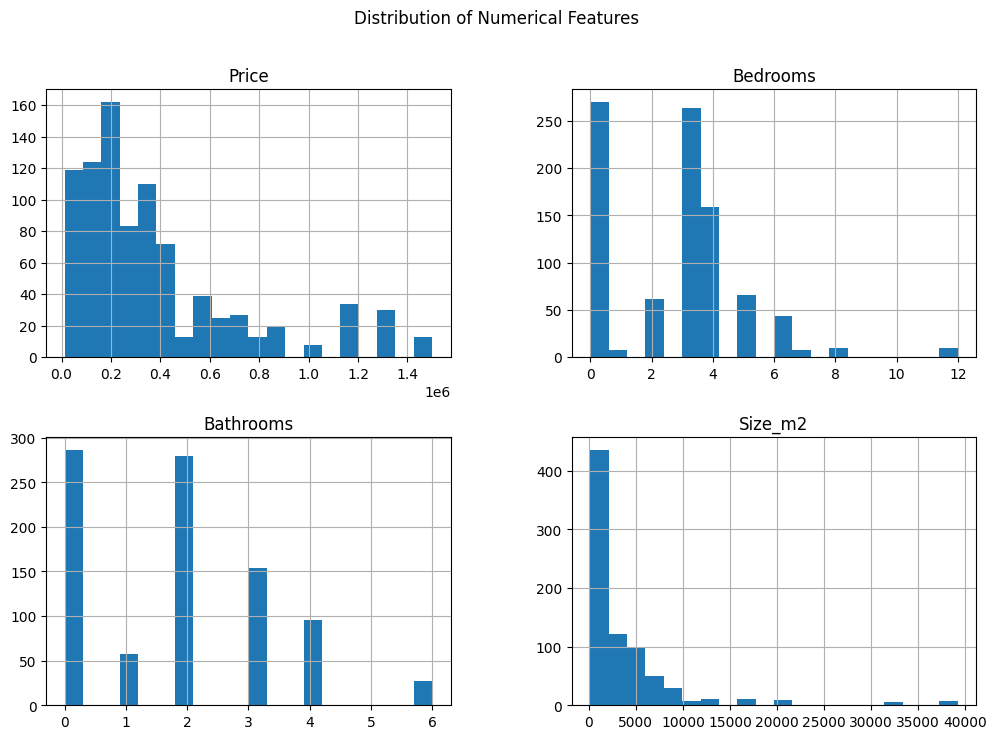

In [ ]:
# Distribution of numerical features
numerical_features = ['Price', 'Bedrooms', 'Bathrooms', 'Size_m2']
df[numerical_features].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribution of Numerical Features")
plt.show()

**Boxplots to detect outliers in numerical**

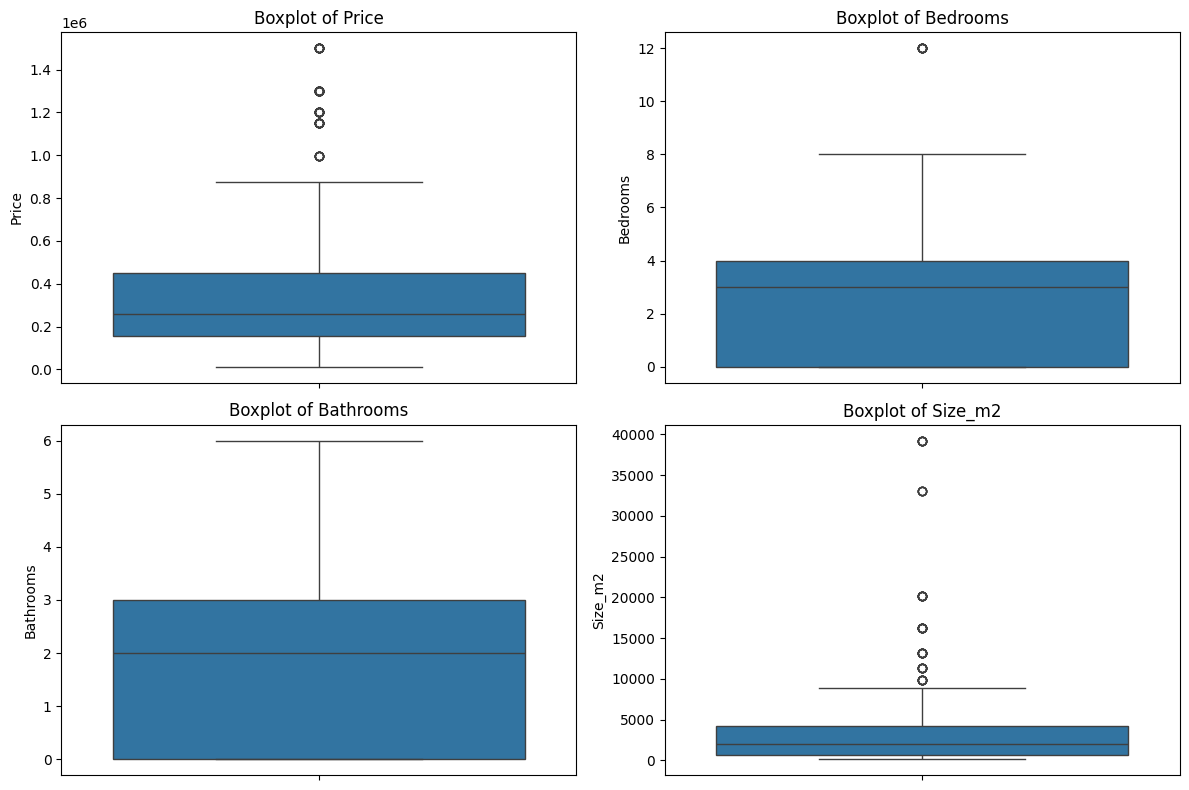

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

**Correlation matrix for numerical features**

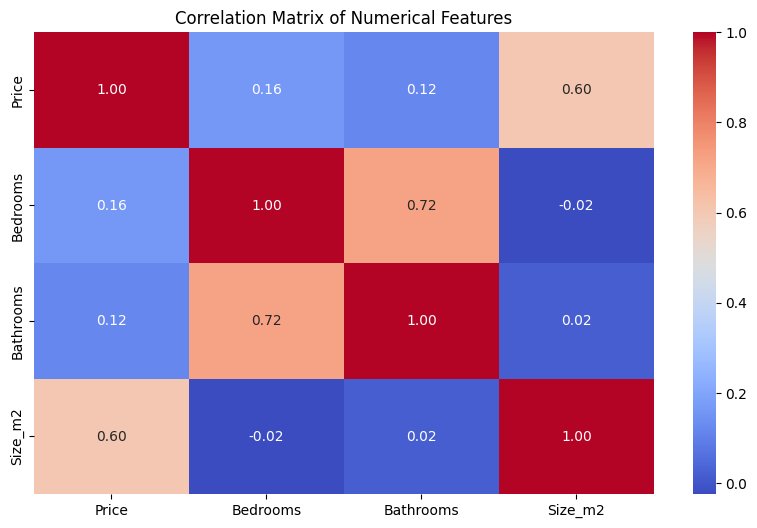

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

**Distribution of categorical features**

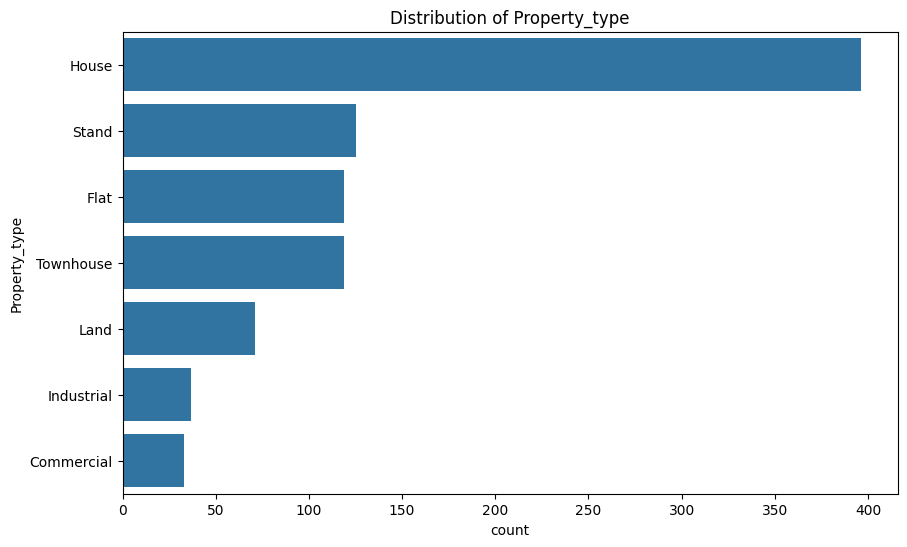

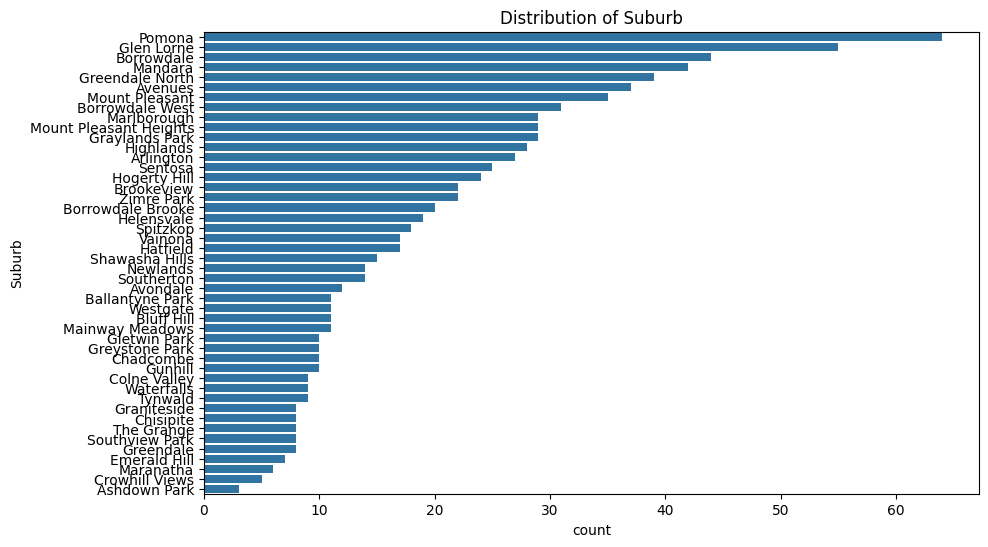

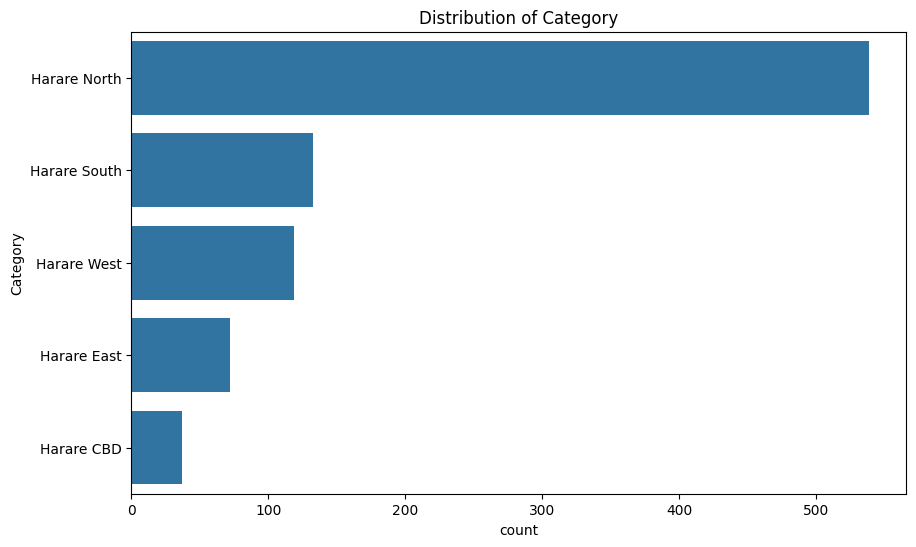

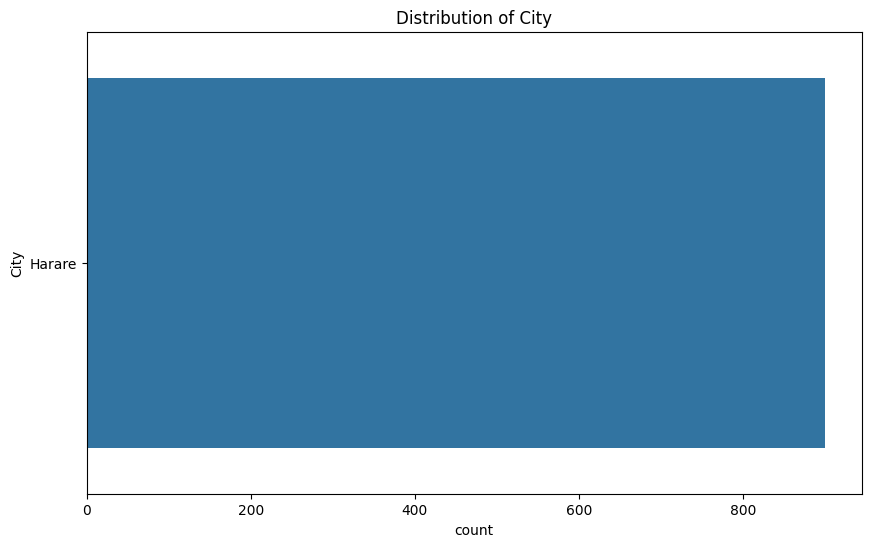

In [ ]:
categorical_features = ['Property_type', 'Suburb', 'Category', 'City']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [ ]:
Category = df.groupby('Category')  # Use groupby() instead of group

# Iterate through groups with sub (group name) and group (DataFrame)
for sub, group in Category:
    print(sub)  # Print the group name (Suburb)
    # print(group)  # Print the data within the group
    # print("-" * 20)  # Print a separator between groups for better readability

Harare CBD
Harare East
Harare North
Harare South
Harare West


**Relationship between Price and other numerical features**

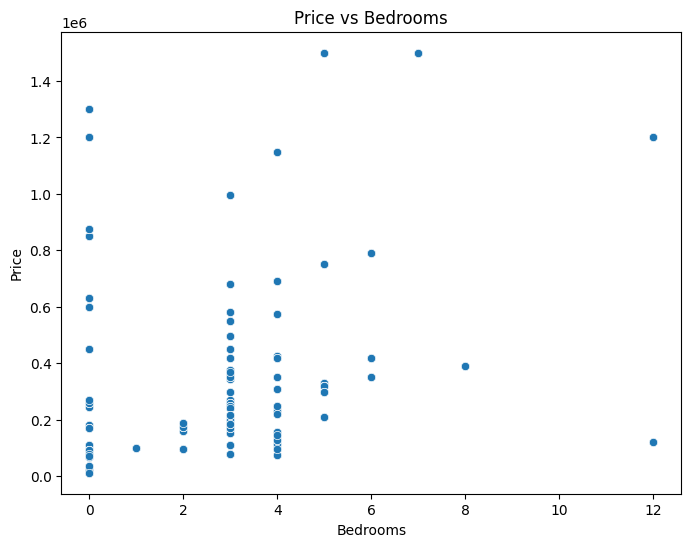

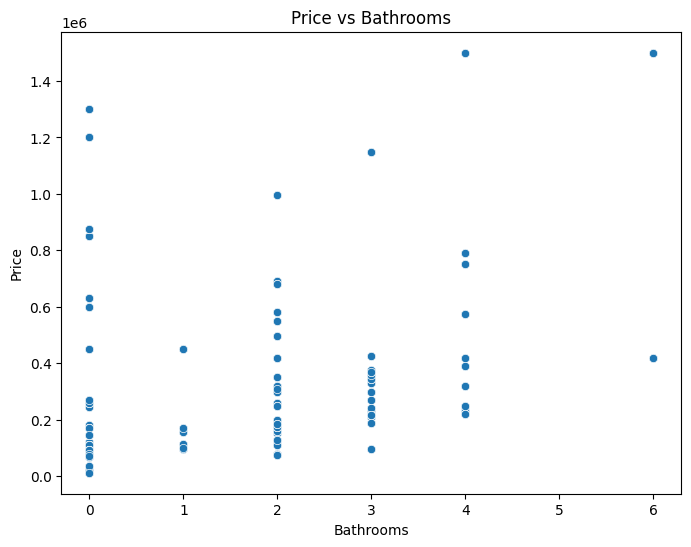

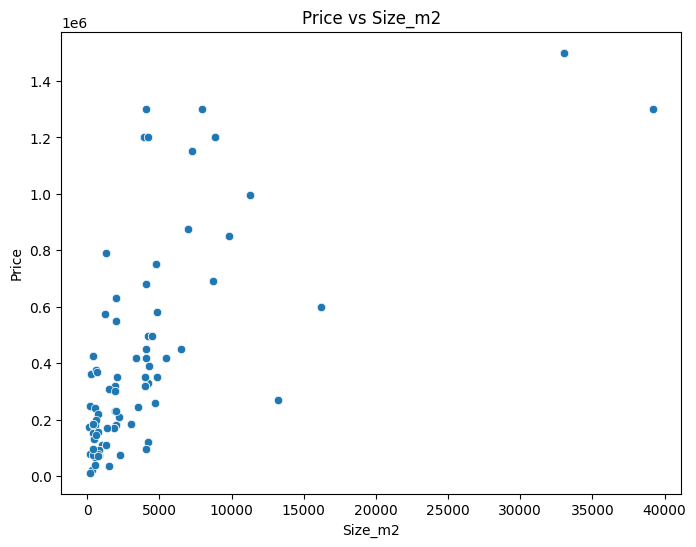

In [ ]:
for feature in numerical_features[1:]:  # Skip Price itself
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['Price'])
    plt.title(f'Price vs {feature}')
    plt.show()

**Pairplot for numerical features**

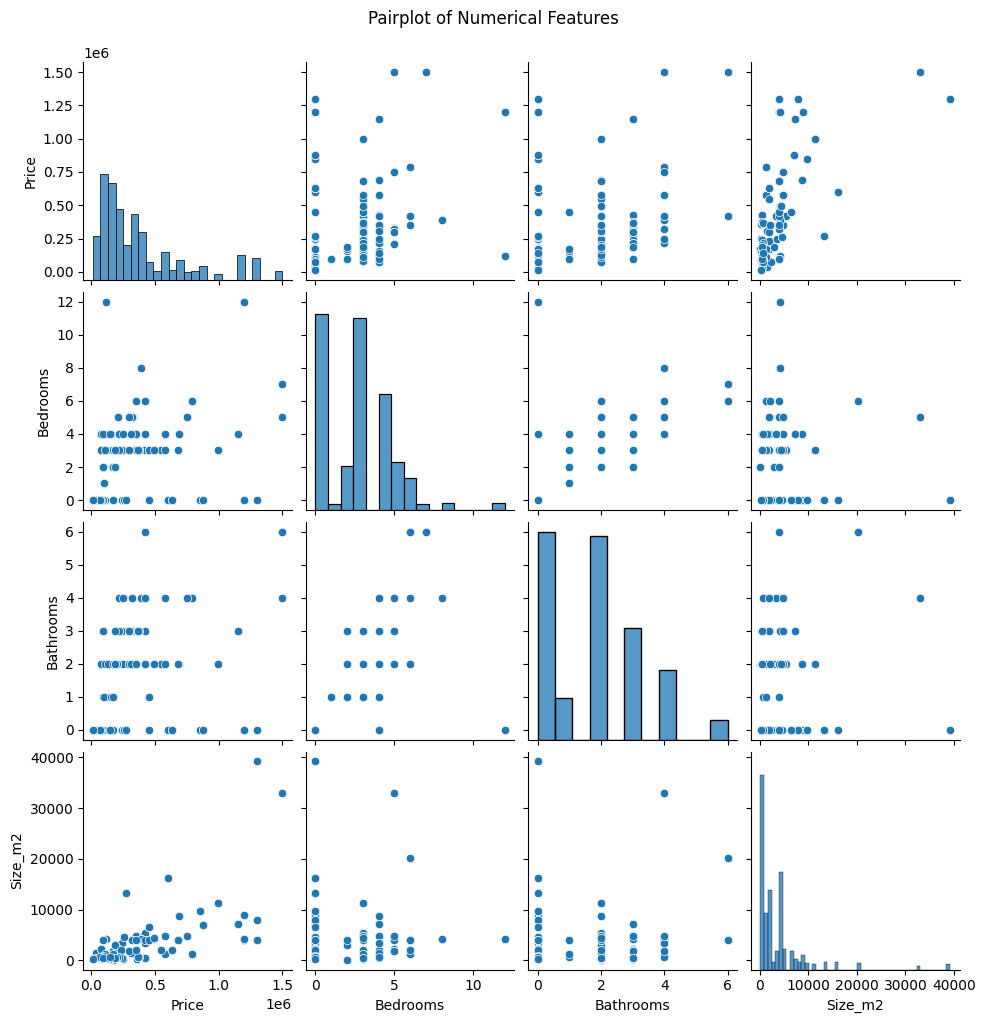

In [ ]:
sns.pairplot(df[numerical_features])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

**Check for unique values in categorical columns**

In [ ]:
print("\nUnique Values in Categorical Columns:")
for feature in categorical_features:
    print(f"{feature}: {df[feature].nunique()} unique values")


Unique Values in Categorical Columns:
Property_type: 7 unique values
Suburb: 46 unique values
Category: 5 unique values
City: 1 unique values


**Top 10 suburbs with the most listings**

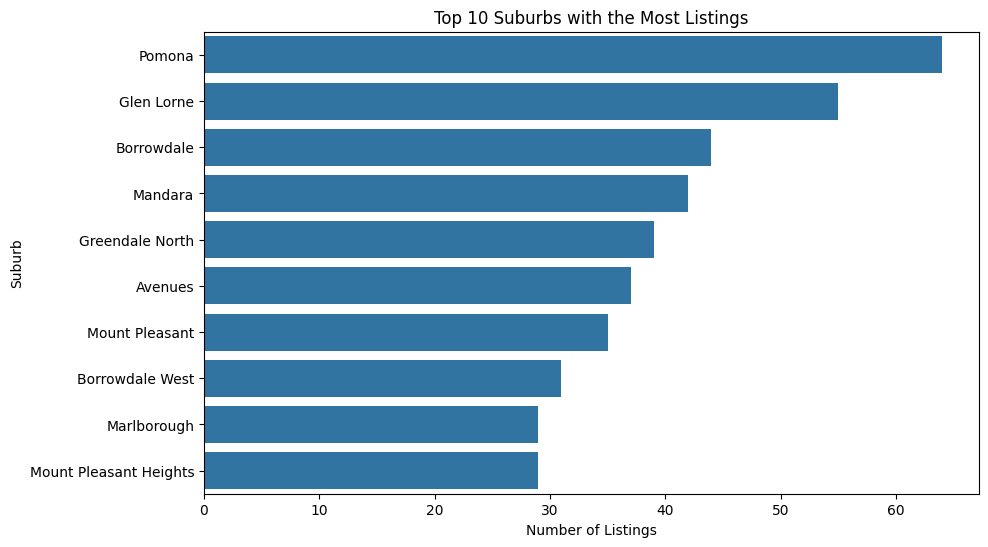

In [ ]:
top_suburbs = df['Suburb'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_suburbs.values, y=top_suburbs.index)
plt.title("Top 10 Suburbs with the Most Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Suburb")
plt.show()

**Average price by property type**

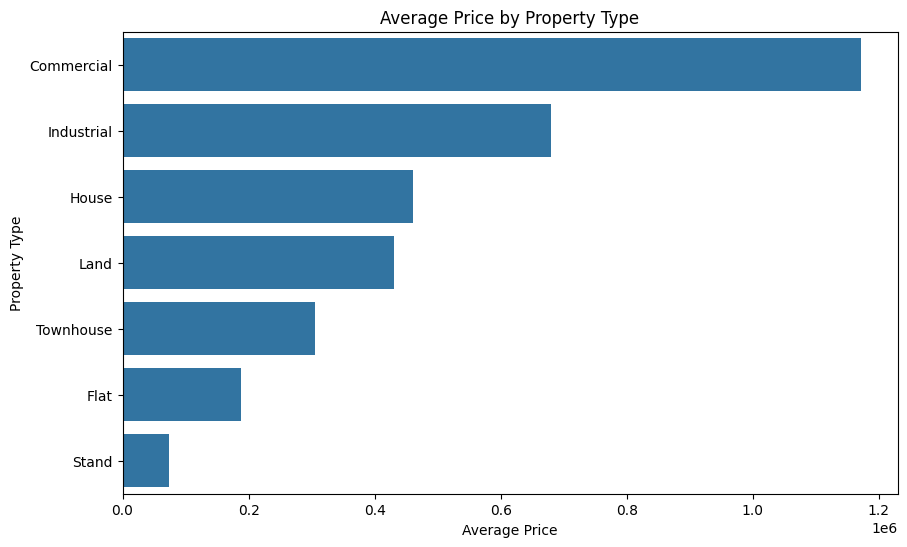

In [ ]:
avg_price_by_type = df.groupby('Property_type')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_type.values, y=avg_price_by_type.index)
plt.title("Average Price by Property Type")
plt.xlabel("Average Price")
plt.ylabel("Property Type")
plt.show()

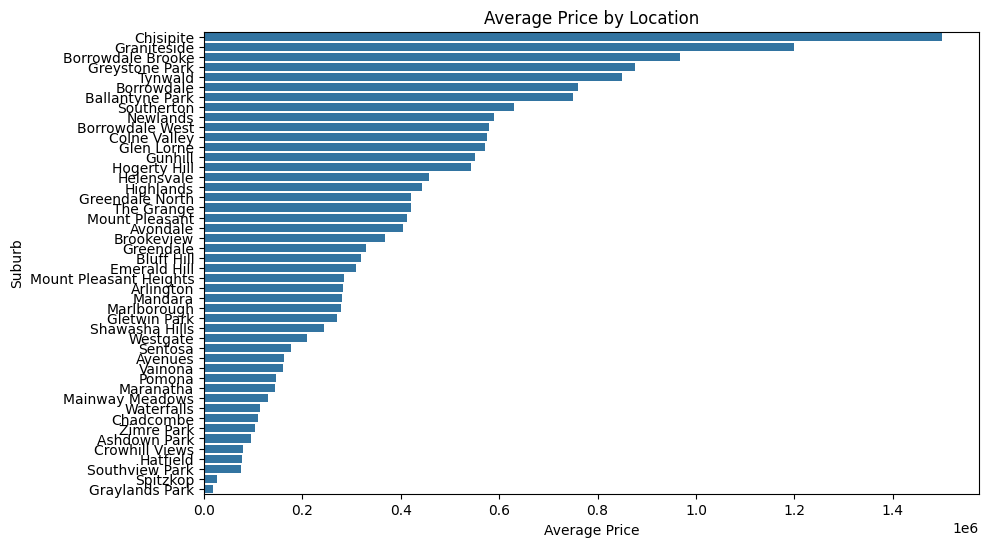

In [ ]:
avg_price_by_suburb = df.groupby('Suburb')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_suburb.values, y=avg_price_by_suburb.index)
plt.title("Average Price by Location")
plt.xlabel("Average Price")
plt.ylabel("Suburb")
plt.show()

**Average size by property type**

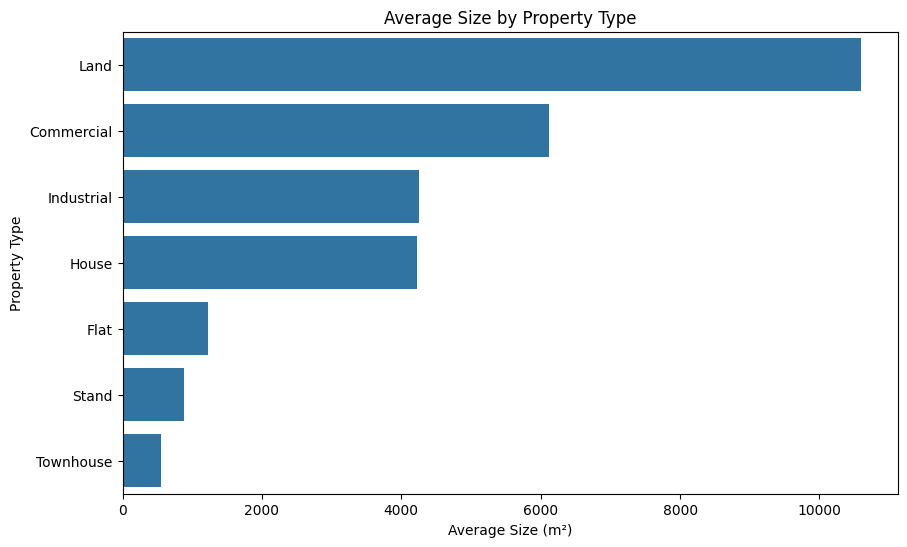

In [ ]:
# Average size by property type
avg_size_by_type = df.groupby('Property_type')['Size_m2'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_size_by_type.values, y=avg_size_by_type.index)
plt.title("Average Size by Property Type")
plt.xlabel("Average Size (m²)")
plt.ylabel("Property Type")
plt.show()

# **Statistical Analysis Results**

In [ ]:
import statsmodels.api as sm
from scipy.stats import pearsonr, f_oneway

# ... (previous code) ...

# Reset indices before dropping rows
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with any missing values in X or y
X = X.dropna()
y = y.dropna()

# Ensure X and y have the same number of rows after dropping missing values
X = X.loc[y.index]  # Align X with y's index

# Pearson correlation
correlation_size, p_value_size = pearsonr(X['Size_m2'], y)
correlation_bedrooms, p_value_bedrooms = pearsonr(X['Bedrooms'], y)
correlation_bathrooms, p_value_bathrooms = pearsonr(X['Bathrooms'], y)

# ... (rest of the code) ...

# Multiple linear regression
X = sm.add_constant(X)  # Add a constant term to the model

model = sm.OLS(y, X).fit()
print(model.summary())

# ... (rest of the code) ...

KeyError: '[785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890] not in index'

# **Feature Selection, Splitting Data for Training, Validation, and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib


# Display the columns in the dataset
print("Columns in the dataset:")
print(df.columns)

# Define features (X) and target (y)
# Assuming 'Price' is the target variable
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target

# Drop rows where the target variable (y) is NaN
missing_y_indices = y.isnull()
if missing_y_indices.any():
    print(f"\nDropping {missing_y_indices.sum()} rows with missing target values.")
    X = X[~missing_y_indices]  # Keep rows where y is not NaN
    y = y[~missing_y_indices]  # Drop corresponding rows in y

# Encode categorical variables using Label Encoding
categorical_features = ['Property_type', 'Suburb', 'Category', 'City']
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature].astype(str))  # Handle potential NaN in categorical columns
    label_encoders[feature] = le  # Save encoders for later use

# Handle missing values in numerical features
numerical_features = ['Bedrooms', 'Bathrooms', 'Size_m2']
imputer = SimpleImputer(strategy='mean')  # Use mean to fill missing values
X[numerical_features] = imputer.fit_transform(X[numerical_features])

# Feature Selection using SelectKBest (for regression)
# Select top 10 features based on F-statistic
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)

# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]
print("\nSelected Features:")
print(selected_feature_names)

# Get the feature scores (F-statistic values)
feature_scores = selector.scores_[selector.get_support()]

# Normalize the feature scores to calculate importance percentages
feature_importance_percentages = (feature_scores / feature_scores.sum()) * 100

# Create a DataFrame to display feature names and their importance percentages
feature_importance_df = pd.DataFrame({
    "Feature": selected_feature_names,
    "Importance (%)": feature_importance_percentages
})

# Sort the DataFrame by importance percentage in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance (%)", ascending=False)

# Display the feature importance percentages
print("\nFeature Importance Percentages:")
print(feature_importance_df)

# Update X with selected features
X = pd.DataFrame(X_selected, columns=selected_feature_names)

# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the resulting datasets
print("\nShapes of the datasets:")
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

# Save the splits to CSV files (optional)
X_train.to_csv('X_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("\nData splitting and feature selection completed!")

Columns in the dataset:
Index(['Price', 'Bedrooms', 'Bathrooms', 'Property_type', 'Size_m2', 'Suburb',
       'Category', 'City'],
      dtype='object')

Dropping 9 rows with missing target values.

Selected Features:
Index(['Bedrooms', 'Bathrooms', 'Property_type', 'Size_m2', 'Suburb',
       'Category', 'City'],
      dtype='object')

Feature Importance Percentages:
         Feature  Importance (%)
3        Size_m2       67.272745
2  Property_type       13.890418
4         Suburb       12.032733
0       Bedrooms        3.806612
1      Bathrooms        2.059743
5       Category        0.937749
6           City        0.000000

Shapes of the datasets:
Training set: (623, 7), (623,)
Validation set: (134, 7), (134,)
Testing set: (134, 7), (134,)

Data splitting and feature selection completed!


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=7. All the features will be returned.
  warnings.warn(


# **4. Model Selection**

Model selection is the process of choosing the best machine learning algorithm for your dataset and problem. Since your dataset involves predicting a continuous target variable (Price), this is a **regression problem**. Below, I'll provide code for selecting and evaluating several regression models, including:

* Linear Regression

* Decision Tree Regressor

* Random Forest Regressor

* Gradient Boosting Regressor

* Support Vector Regressor (SVR)

We'll use cross-validation to evaluate the models and select the best one based on performance metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

Models Evaluated:

1. Linear Regression: A simple baseline model.

 * Decision Tree Regressor: A non-linear model that can capture complex relationships.

 * Random Forest Regressor: An ensemble of decision trees, often more robust and accurate.

 * Gradient Boosting Regressor: A powerful ensemble method that builds trees sequentially to correct errors.

 * Support Vector Regressor (SVR): A model that works well for non-linear relationships.

In [ ]:
# Load the training data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv').squeeze()  # Convert to Series

# Define a list of models to evaluate
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Support Vector Regressor", SVR())
]

# Define a KFold cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model using cross-validation
results = []
for name, model in models:
    # Cross-validation for R² score
    cv_r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    # Cross-validation for Mean Absolute Error (MAE)
    cv_mae = -cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    # Cross-validation for Mean Squared Error (MSE)
    cv_mse = -cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

    # Store results
    results.append({
        "Model": name,
        "R² Score (Mean)": np.mean(cv_r2),
        "R² Score (Std)": np.std(cv_r2),
        "MAE (Mean)": np.mean(cv_mae),
        "MAE (Std)": np.std(cv_mae),
        "MSE (Mean)": np.mean(cv_mse),
        "MSE (Std)": np.std(cv_mse)
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print("Model Evaluation Results:")
print(results_df)

2. Cross-Validation:

 * KFold: Splits the data into 5 folds and evaluates the model on each fold.

 * Metrics: R² Score (higher is better), MAE (lower is better), and MSE (lower is better).

3. Results:

 * The performance of each model is stored in a DataFrame for easy comparison.

 * The best model is selected based on the highest mean R² Score.

4. Saving the Best Model:

 * The best model is saved to a file (best_regression_model.pkl) using joblib for later use.

In [ ]:
# Select the best model based on R² Score
best_model_info = results_df.loc[results_df['R² Score (Mean)'].idxmax()]
best_model_name = best_model_info['Model']
best_model = next(model for name, model in models if name == best_model_name)

print(f"\nBest Model: {best_model_name}")

# Train the best model on the full training set
best_model.fit(X_train, y_train)

# Save the best model (optional)
import joblib
joblib.dump(best_model, 'realevp_regression_model.pkl')
print("Best model saved as 'realevp_regression_model.pkl'.")

# Evaluate the Best Model on the Test Set:

* Load the test data (X_test, y_test).

* Use the best model to make predictions and evaluate its performance on unseen data.
***
To calculate the accuracy rate in percentiles for a regression model, we need to define what "accuracy" means in the context of regression. Unlike classification, regression models predict continuous values, so we cannot directly calculate accuracy as a percentage of correct predictions. Instead, we can use metrics like R² Score or define a custom accuracy metric based on how close the predictions are to the actual values.

For example, we can calculate the percentage of predictions that fall within a certain tolerance (e.g., ±10%) of the actual values. This is often referred to as percentage **accuracy within a tolerance**.

In [ ]:
# Load the test data
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv').squeeze()

# Load the best model
import joblib
best_model = joblib.load('realevp_regression_model.pkl')

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate R² Score (in percentiles)
r2 = r2_score(y_test, y_pred)
r2_percentile = r2 * 100  # Convert to percentage
print(f"R² Score (Accuracy): {r2_percentile:.2f}%")

# Define a custom accuracy metric: Percentage of predictions within ±10% of actual values
def accuracy_within_tolerance(y_true, y_pred, tolerance=0.10):
    """
    Calculate the percentage of predictions within a specified tolerance of the actual values.

    Parameters:
        y_true (array-like): Actual values.
        y_pred (array-like): Predicted values.
        tolerance (float): Tolerance level (e.g., 0.10 for ±10%).

    Returns:
        float: Percentage of predictions within the tolerance.
    """
    # Calculate the absolute percentage error for each prediction
    percentage_errors = np.abs((y_true - y_pred) / y_true)

    # Count the number of predictions within the tolerance
    within_tolerance = np.sum(percentage_errors <= tolerance)

    # Calculate the percentage of predictions within the tolerance
    accuracy_percentile = (within_tolerance / len(y_true)) * 100
    return accuracy_percentile

# Calculate accuracy within ±10% tolerance
tolerance = 0.10  # ±10%
accuracy_percentile = accuracy_within_tolerance(y_test, y_pred, tolerance)
print(f"Accuracy within ±{tolerance * 100:.0f}%: {accuracy_percentile:.2f}%")

# Calculate accuracy within ±20% tolerance
tolerance = 0.20  # ±20%
accuracy_percentile = accuracy_within_tolerance(y_test, y_pred, tolerance)
print(f"Accuracy within ±{tolerance * 100:.0f}%: {accuracy_percentile:.2f}%")

# Visualize Predictions:

Plotting the actual vs. predicted values to visually assess the model's performance.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()